<a href="https://colab.research.google.com/github/danon6868/BI-stat-course/blob/main/lecture_5_hypothesis_testing/homework/homework_lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [38]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# В переменную data_path надо положить путь до данных
data_path = "../data"
expression_data = pd.read_csv(f"{data_path}/homework_lecture_5_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [40]:
# i've decided to look at the shape of the table to make sure that it's huge and scary
expression_data.shape

(1000, 18793)

In [41]:
# just curious how many B-cells and NK-cells we have in the dataset
expression_data\
    .groupby('Cell_type', as_index=False)\
    .aggregate({'TMCC1': 'count'}) # if we use count it does not really matter what variable we aggresate on

# now I know there are 500 B-cells and 500 NK-cells

,Cell_type,TMCC1
0,B_cell,500
1,NK_cell,500


In [42]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [43]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

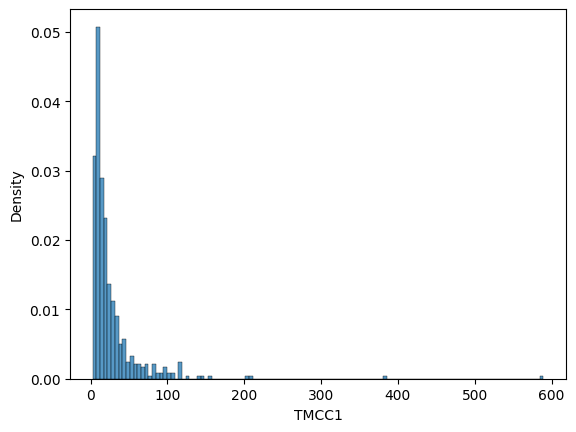

In [44]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

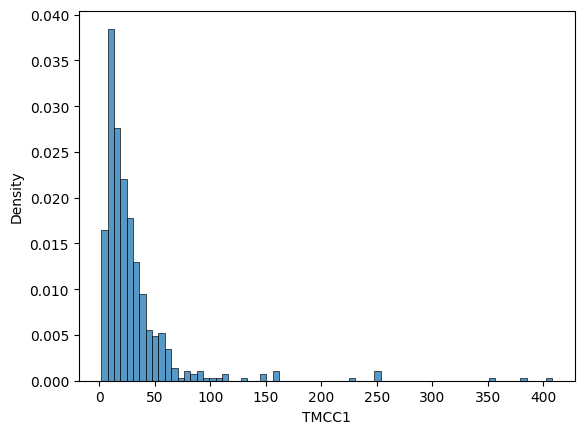

In [45]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

In [46]:
def demonstrate_clt(
    expressions, 
    sample_size=1000,
    n_samples=200):
    mean_expressions = []
    for _ in range(n_samples):
        sample = np.random.choice(expressions, sample_size)
        mean_expression = np.mean(sample)
        mean_expressions.append(mean_expression)
    return mean_expressions


26.932975466000997


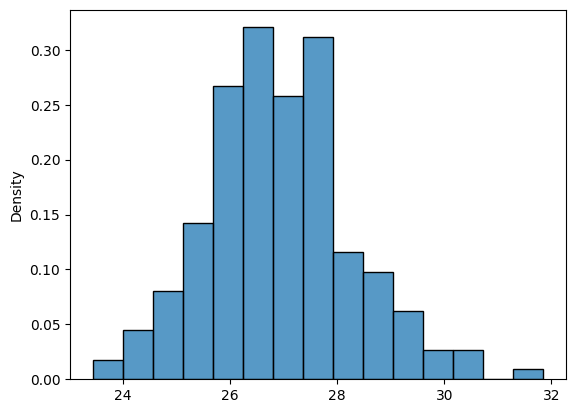

In [47]:
b_means = demonstrate_clt(b_cells_expression_data[example_gene])
sns.histplot(b_means, stat="density")
print(np.mean(b_means))

30.408084665097


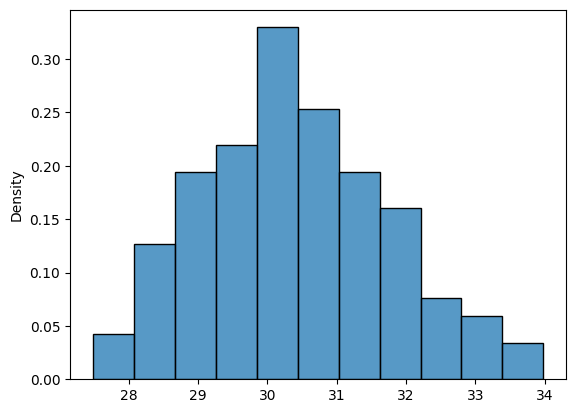

In [48]:
nk_means = demonstrate_clt(nk_cells_expression_data[example_gene])
sns.histplot(nk_means, stat="density")
print(np.mean(nk_means))

*Распределения выборочных средних для обоих типов клеток выглядят почти нормально. Над графиками я вывела среднее по средним для каждого типа клеток, они различаются, но судя по распределениям, непонятно, достоверно ли.*

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [49]:
def calculate_ci(sample):
    std = sample.std()
    mean = sample.mean()
    se = std / np.sqrt(len(sample))
    left_b = mean - 1.96 * se
    right_b = mean + 1.96 * se

    return left_b, right_b

In [50]:
print(f'TMCC1 expression in B-cells confidence interval: {calculate_ci(b_cells_expression_data["TMCC1"])}')
print(f'TMCC1 expression in NK-cells confidence interval: {calculate_ci(nk_cells_expression_data["TMCC1"])}')

TMCC1 expression in B-cells confidence interval: (23.42883838285794, 30.529105275542065)
TMCC1 expression in NK-cells confidence interval: (26.854734824710704, 34.00790437608929)


*Доверительные интервалы пересекаются, значит, у нас нет оснований отвергать нулевую гипотезу о том, что экспрессия гена TMCC1 у B-клеток и NK-клеток различается.*

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [51]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [52]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

/tmp/ipykernel_9273/757604766.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, # 95% доверительный интервал


(23.420272072079296, 30.53767158632071)

In [53]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

/tmp/ipykernel_9273/2133334576.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, # 95% доверительный интервал


(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [54]:
def check_intervals_intersect(first_ci, second_ci):
    """If True, then the intervals do intersect and therefore the difference is not significant
    If False, then the intervals do not intersect and therefore the difference is significant"""
    return (max(first_ci[0], second_ci[0])) < min(first_ci[1], second_ci[1])


Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

In [55]:
gene_names = expression_data.columns[:-1] # set with all gene names for further iteration
ci_test_results = []
for gene in gene_names:
    ci_b_cell = st.t.interval(
        alpha=0.95, # confidence interval for gene expression in b-cells
        df=len(b_cells_expression_data[gene]) - 1,
        loc=np.mean(b_cells_expression_data[gene]),
        scale=st.sem(b_cells_expression_data[gene])
        )
    ci_nk_cell = st.t.interval(
        alpha=0.95, # confidence interval for gene expression in nk-cells
        df=len(nk_cells_expression_data[gene]) - 1, 
        loc=np.mean(nk_cells_expression_data[gene]), 
        scale=st.sem(nk_cells_expression_data[gene])
        )
    ci_test_results.append(check_intervals_intersect(ci_b_cell, ci_nk_cell)) 

ci_test_results

/tmp/ipykernel_9273/297301592.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_b_cell = st.t.interval(
/tmp/ipykernel_9273/297301592.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_nk_cell = st.t.interval(


[True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [56]:
def check_dge_with_ci(first_table, second_table):
    gene_names = set(first_table.columns).intersection(set(second_table.columns)).difference(set(["Cell_type"]))
    ci_test_results = dict()

    for gene in gene_names:
        ci_first_table = st.t.interval(
            alpha=0.95, # confidence interval for gene expression in cells from fisrt table
            df=len(first_table[gene]) - 1,
            loc=np.mean(first_table[gene]),
            scale=st.sem(first_table[gene]))

        ci_second_table = st.t.interval(
            alpha=0.95, # confidence interval for gene expression in cells from second table
            df=len(second_table[gene]) - 1, 
            loc=np.mean(second_table[gene]), 
            scale=st.sem(second_table[gene]))
                                        
        ci_test_results[gene] = not (check_intervals_intersect(ci_first_table, ci_second_table))
        
    return ci_test_results

*Проверяю работу функции*

In [57]:
check_dge_with_ci(
    b_cells_expression_data, 
    nk_cells_expression_data
    )
# False or True is the answer to a question whether expressions differ significantly

/tmp/ipykernel_9273/2706849288.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_first_table = st.t.interval(
/tmp/ipykernel_9273/2706849288.py:12: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_second_table = st.t.interval(


{'ARHGAP28': False,
 'C9orf153': False,
 'ZNF660': False,
 'PODXL2': False,
 'SLC3A1': False,
 'ANKRD54': True,
 'BPI': False,
 'IL36RN': False,
 'NUBPL': False,
 'CSPG5': False,
 'PTPN22': True,
 'KIAA1328': False,
 'GLYATL3': False,
 'ASIC3': False,
 'SPDYC': False,
 'UQCRH': True,
 'CEP55': False,
 'ST6GALNAC6': True,
 'GORAB': False,
 'FAM166B': False,
 'MSX1': False,
 'ZNF682': False,
 'LRRN2': False,
 'ZBED6CL': False,
 'LRCH3': False,
 'ZNF324B': False,
 'C1D': True,
 'JADE3': True,
 'PRND': False,
 'PSKH2': False,
 'IER2': True,
 'AC006449.1': True,
 'CAPG': False,
 'MEGF6': True,
 'HLA-A': True,
 'AANAT': False,
 'WTIP': False,
 'SIGLEC10': False,
 'AL049794.1': False,
 'NEK10': False,
 'LGI2': False,
 'ST8SIA5': True,
 'TNFRSF19': False,
 'ARHGEF6': True,
 'MYH7B': False,
 'OR2H2': False,
 'FOXN1': False,
 'XCL1': True,
 'CXCR2': False,
 'LSMEM1': False,
 'ZC3H12C': False,
 'UCK1': False,
 'CLDND1': True,
 'IMPAD1': False,
 'TBC1D28': False,
 'ANGPT1': False,
 'GSR': False,
 

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [58]:
from statsmodels.stats.weightstats import ztest

In [59]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [60]:
def check_dge_with_ztest(table_1, table_2):
    gene_names = set(table_1.columns).intersection(set(table_2.columns)).difference(set(["Cell_type"]))
    z_test_results = dict()

    for gene in gene_names:
        z_result = ztest(
            table_1[gene], 
            table_2[gene]
            )
        p_val = z_result[1]
        z_test_results[gene] = p_val
    
    return z_test_results

*Проверяю работу функции*

In [61]:
check_dge_with_ztest(
    b_cells_expression_data,
    nk_cells_expression_data
)

{'ARHGAP28': 0.9165090764459518,
 'C9orf153': 0.5321104795533267,
 'ZNF660': 0.9078227143452553,
 'PODXL2': 0.15796608926654132,
 'SLC3A1': 0.1689102550289615,
 'ANKRD54': 0.0008889077616379405,
 'BPI': 0.45546751926278684,
 'IL36RN': 0.819320572551775,
 'NUBPL': 0.3399805142785177,
 'CSPG5': 0.7796781000371347,
 'PTPN22': 8.179063702393013e-12,
 'KIAA1328': 0.9295123406808125,
 'GLYATL3': 0.3225595947406802,
 'ASIC3': 0.16868008717687089,
 'SPDYC': 0.3277888803149476,
 'UQCRH': 4.5347313988889915e-08,
 'CEP55': 0.7136866561146094,
 'ST6GALNAC6': 3.5675629790037695e-47,
 'GORAB': 0.8933081843827927,
 'FAM166B': 0.14320659476035164,
 'MSX1': 0.14721275391290128,
 'ZNF682': 0.4841341045729882,
 'LRRN2': 0.03421226071189592,
 'ZBED6CL': 0.13608057301387705,
 'LRCH3': 0.8535571222603836,
 'ZNF324B': 0.45552088846422,
 'C1D': 0.00017952355159722616,
 'JADE3': 2.3383988934801617e-08,
 'PRND': 0.42395268124563235,
 'PSKH2': 0.4513636549825937,
 'IER2': 2.5772040100825054e-10,
 'AC006449.1': 4

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

*В предыдущих заданиях я пару раз использовала словари, а тут лучше всё организовать в списки. Для предыдущих функций оставлю вывод в виде словаря (мне кажется такой вывод более логичным для проверки одним тестом, если пользователь не захочет другие), а для программы перепишу эти функции, немного изменив их вывод. Надеюсь, так будет ок!*

In [62]:
def diffexpr_ci(first_table, second_table):
    """function for a tool that calculates the difference between gene expressions from two tables using confidence intervals"""
    gene_names = set(first_table.columns).intersection(set(second_table.columns)).difference(set(["Cell_type"])) # gene name has to be in both tables and the cell type has not to be considered as a gene name
    genes = list() # list of gene names
    ci_test_results = list() # results list

    for gene in gene_names:
        ci_first_table = st.t.interval(
            alpha=0.95, # confidence interval for gene expression in cells from fisrt table
            df=len(first_table[gene]) - 1,
            loc=np.mean(first_table[gene]),
            scale=st.sem(first_table[gene]))

        ci_second_table = st.t.interval(
            alpha=0.95, # confidence interval for gene expression in cells from second table
            df=len(second_table[gene]) - 1, 
            loc=np.mean(second_table[gene]), 
            scale=st.sem(second_table[gene]))
                                        
        ci_test_results.append(not (check_intervals_intersect(ci_first_table, ci_second_table))) # if intervals do not intersect we consider the difference significant
        genes.append(gene)
    return genes, ci_test_results # two lists so that gene name would correspond to ci test result

In [63]:
def diffexpr_ztest(table_1, table_2):
    """function for a tool to calculate differences between gene expressions usinf ztest"""
    gene_names = set(table_1.columns).intersection(set(table_2.columns)).difference(set(["Cell_type"])) # gene names for comparison have to be in both tables and cell type would not be considered as gene
    z_test_values = list() # list for p_values
    z_test_results = list() # list for results in terms True/False 

    for gene in gene_names:
        z_result = ztest(
            table_1[gene], 
            table_2[gene]
            )
        p_val = z_result[1]
        z_test_values.append(p_val)
        z_test_results.append(p_val < 0.05)
    
    return z_test_results, z_test_values

In [64]:
def diff_means(table_1, table_2):
    """calculate the difference benween means of each gene expressions between two tables"""
    gene_names = set(table_1.columns).intersection(set(table_2.columns)).difference(set(["Cell_type"]))
    difference = list()

    for gene in gene_names:
        difference.append(np.mean(table_2[gene]) - np.mean(table_1[gene]))
    return difference

In [65]:
def diffexpr(
    first_cell_type_expressions_path,
    second_cell_type_expressions_path,
    save_results_table
    ):
    
    first_cell_type_expressions = pd.read_csv(first_cell_type_expressions_path, index_col=0) # upload first table
    second_cell_type_expressions = pd.read_csv(second_cell_type_expressions_path, index_col=0) # upload second table

    gen_names = diffexpr_ci(first_cell_type_expressions, second_cell_type_expressions)[0] # list with gene names
    ci_results = diffexpr_ci(first_cell_type_expressions, second_cell_type_expressions)[1] # list with ci results
    z_results = diffexpr_ztest(first_cell_type_expressions, second_cell_type_expressions)[0] # list with ztest results
    z_p_vals = diffexpr_ztest(first_cell_type_expressions, second_cell_type_expressions)[1] # list with ztest p values
    mean_diff = diff_means(first_cell_type_expressions, second_cell_type_expressions) # list with difference between means of expressions

    results = {
        "gene_name": gen_names,
        "ci_test_results": ci_results,
        "z_test_results": z_results,
        "z_test_p_values": z_p_vals,
        "mean_diff": mean_diff
    } 

    results = pd.DataFrame(results)
    results.to_csv(f"{save_results_table}.csv")

In [66]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [67]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

<div>
<img src="call.png" wigth="300">
</div>

Самое классное в беседе было то, что мы обнаружили общий интерес к музыке на виниле :)